### Exploratory Data Analysis

EDA on IMDB dataset
21 march 2023, tisdag
Dataset link from kaggle. 
https://www.kaggle.com/datasets/georgescutelnicu/top-100-popular-movies-from-2003-to-2022-imdb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/ecombo/Desktop/DS_project/data/movies.csv')

In [3]:
df.head(5)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [4]:
df.describe()

,Rating,Year
count,1999.000000,2000.000000
mean,6.661631,2012.500000
std,0.911507,5.767723
min,1.900000,2003.000000
25%,6.100000,2007.750000
50%,6.700000,2012.500000
75%,7.300000,2017.250000
max,9.000000,2022.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [6]:
df.shape

(2000, 13)

In [7]:
#drop duplicates and replace with 0 
df.replace(np.nan,'0',inplace = True)

In [8]:
df.isnull().sum()

Title                0
Rating               0
Year                 0
Month                0
Certificate          0
Runtime              0
Directors            0
Stars                0
Genre                0
Filming_location     0
Budget               0
Income               0
Country_of_origin    0
dtype: int64

In [9]:
# There is a movie without rating! Lets find out
#movie_wo_rating = df[df['Rating'].isna()]['Title']
#print(f' Movies with no rating {movie_wo_rating}')

In [18]:
# Drop all na values from 'rating'
df.dropna(subset=['Rating'], inplace=False)

,Title,Rating,Year,Month,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,A Tale of Two Sisters,7.1,2003,June,114,Jee woon Kim,"Lim Soo jung, Yum Jung ah, Kim Kap su, Moon Ge...","Drama, Horror, Mystery",South Korea,Unknown,"$1,062,878",South Korea
1996,Lara Croft Tomb Raider: The Cradle of Life,5.5,2003,July,117,Jan de Bont,"Angelina Jolie, Gerard Butler, Chris Barrie, C...","Action, Adventure, Fantasy",Greece,"$95,000,000","$160,099,222","United States, Germany, Japan, United Kingdom,..."
1997,Gothika,5.8,2003,November,98,Mathieu Kassovitz,"Halle Berry, Pen lope Cruz, Robert Downey Jr ,...","Horror, Mystery, Thriller",Canada,"$40,000,000","$141,591,324","United States, France, Canada, Spain"
1998,Ong-Bak: The Thai Warrior,7.1,2003,February,105,Prachya Pinkaew,"Tony Jaa, Phetthai Vongkumlao, Pumwaree Yodkam...","Action, Crime, Thriller",Thailand,Unknown,"$20,235,426","Thailand, France, Hong Kong"


In [19]:
print(f'Current number of rows: {df.shape[0]}')
print(f'Current number of columns: {df.shape[1]}')

Current number of rows: 2000
Current number of columns: 12


In [12]:
#check if the column is gone
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              2000 non-null   object
 1   Rating             2000 non-null   object
 2   Year               2000 non-null   int64 
 3   Month              2000 non-null   object
 4   Certificate        2000 non-null   object
 5   Runtime            2000 non-null   object
 6   Directors          2000 non-null   object
 7   Stars              2000 non-null   object
 8   Genre              2000 non-null   object
 9   Filming_location   2000 non-null   object
 10  Budget             2000 non-null   object
 11  Income             2000 non-null   object
 12  Country_of_origin  2000 non-null   object
dtypes: int64(1), object(12)
memory usage: 203.2+ KB


In [13]:
df= df.drop(['Certificate'], axis=1)

In [14]:
print(f'Current number of rows: {df.shape[0]}')
print(f'Current number of columns: {df.shape[1]}')

Current number of rows: 2000
Current number of columns: 12


In [15]:
#to check number of null values for each column
df.isnull().sum()

Title                0
Rating               0
Year                 0
Month                0
Runtime              0
Directors            0
Stars                0
Genre                0
Filming_location     0
Budget               0
Income               0
Country_of_origin    0
dtype: int64

In [16]:
#This did not work out well // Excluded Ratings column due to dropna()
columns = df.loc[:, df.notna().all()]

for column_header in columns:
    print(column_header)

Title
Rating
Year
Month
Runtime
Directors
Stars
Genre
Filming_location
Budget
Income
Country_of_origin


In [20]:
# There we actuallly see that Unknown were not dropped previously.
df.isna().any().sum()

0

In [21]:
#Double checking on different code with rows are 'Unknown'
df1 = df[(df['Budget']=='Unknown')]
df1 = df[(df['Income']=='Unknown')]

df1.any().sum()      

12

In [24]:
df.head(2)

,Title,Rating,Year,Month,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"


### Getting rid of currency symbols

In [25]:
# Conversion function (converts currency and to float)
def convert_to_usd(amount):
    amount.replace(' ', '')
    amount.replace('\xa0', '')
    if amount.startswith('$'):
        amount = amount.strip('$').replace(',', '')   # must remove commas
        return float(amount)   # convert str into float
    elif amount.startswith('€'):
        # Exchange rate for EUR to USD
        amount = amount.strip('€').replace(',', '')
        return float(amount) * 1.06 
    elif amount.startswith('¥'):
        # Exchange rate for YEN to USD
        amount = amount.strip('¥').replace(',', '')
        return float(amount) * 0.0075
    elif amount.startswith('₹'):
        # Exchange rate for RPL to USD
        amount = amount.strip('₹').replace(',', '')
        return float(amount) * 0.012 
    elif amount.startswith('SEK'):
        # Exchange rate for SEK to USD
        amount = amount.strip('SEK').replace(',', '')
        return float(amount) * 0.094
    elif amount.startswith('DKK'):
        # Exchange rate for RPL to USD
        amount = amount.strip('DKK').replace(',', '')
        return float(amount) * 0.14
    elif amount.startswith('£'):
        # Exchange rate for RPL to USD
        amount = amount.strip('£').replace(',', '')
        return float(amount) * 1.21  
    else:
        return None

In [26]:
#Applying the conversion function
df['Budget'] = df['Budget'].apply(convert_to_usd)
df['Income'] = df['Income'].apply(convert_to_usd)

In [ ]:
df = df.astype({'Budget':'float','Income':'float'})

In [ ]:
df.head(3)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             2000 non-null   object 
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Runtime            2000 non-null   object 
 5   Directors          2000 non-null   object 
 6   Stars              2000 non-null   object 
 7   Genre              2000 non-null   object 
 8   Filming_location   2000 non-null   object 
 9   Budget             1686 non-null   float64
 10  Income             1855 non-null   float64
 11  Country_of_origin  2000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 187.6+ KB


In [27]:
# Find out those with 'Unknowns' got undetected.
df_income_na = (df1['Income'] == 'Unknown').sum()
df_budget_na = (df1['Budget'] == 'Unknown').sum()


In [29]:
print(df_income_na)
print(df_budget_na)

145
100


In [30]:
# Convert the 'Unknown' values to NaN __Gpt
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')

In [31]:
income_mean= df['Income'].mean()   
budget_mean= df['Budget'].mean()

print(income_mean)
print(budget_mean)

188720624.70781672
61466373.15900949


In [32]:
# Fill the missing values with the means
df['Income'].fillna(income_mean, inplace=True)
df['Budget'].fillna(budget_mean, inplace=True)

In [33]:
# Count the number of missing values in each variable
df_income_na = df['Income'].isna().sum()
df_budget_na = df['Budget'].isna().sum()

In [34]:
print(df_income_na)
print(df_budget_na)

0
0


In [ ]:
df.head(3)

In [35]:
# Convert values of (e) to regular 6 or 7 digit numbers and round them for Income, Budget columns
def process_data(df):
    
    df['Income'] = df['Income'].apply(lambda x: round(x * 1e-2, 7))
    
    return df

In [36]:
processed_df = process_data(df)

In [37]:
processed_df.head(3)

,Title,Rating,Year,Month,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,22679469.83,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1089.67,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2392686.02,"Japan, United States"


In [42]:
df_NaN_rows= (processed_df['Income']).isna().sum()

print(df_NaN_rows)

0


In [43]:
# Update NaN values are gone and replaced with mean value of each columns (Income, Budget)

processed_df['Income'].sort_values()

396            3.05
101            7.03
1203          15.41
1176          18.08
1366          34.92
           ...     
405     20483597.54
714     20695217.00
0       22679469.83
305     27975013.28
1300    29229179.14
Name: Income, Length: 2000, dtype: float64

In [44]:
processed_df.describe()

,Year,Budget,Income
count,2000.000000,2.000000e+03,2.000000e+03
mean,2012.500000,6.146637e+07,1.887206e+06
std,5.767723,5.581133e+07,2.671559e+06
min,2003.000000,1.000000e+01,3.050000e+00
25%,2007.750000,2.000000e+07,2.956873e+05
50%,2012.500000,5.000000e+07,1.014846e+06
75%,2017.250000,7.500000e+07,2.081357e+06
max,2022.000000,3.560000e+08,2.922918e+07


In [45]:
#here are the Nan that is replaced. 
df.isna().sum()

Title                0
Rating               0
Year                 0
Month                0
Runtime              0
Directors            0
Stars                0
Genre                0
Filming_location     0
Budget               0
Income               0
Country_of_origin    0
dtype: int64

### Exponenential value (e)

The value "2.267947e+09" is in scientific notation, aka"exponential notation". It represents a floating-point number in a compact way, where the "e" indicates the power of 10 to which the number should be multiplied. In this case, "e+09" means that the number should be multiplied by 10 to the power of 9, which is equivalent to 1 followed by 9 zeros, or 1,000,000,000.


In [ ]:
processed_df['Budget'].sort_values()

print(f'Current number of rows: {df.shape[0]}')
print(f'Current number of columns: {df.shape[1]}')

### Now we have df and df_processed values // I am gonna visualise for both to compare and check for inconsistencies if any. 

In [46]:
df.describe()

,Year,Budget,Income
count,2000.000000,2.000000e+03,2.000000e+03
mean,2012.500000,6.146637e+07,1.887206e+06
std,5.767723,5.581133e+07,2.671559e+06
min,2003.000000,1.000000e+01,3.050000e+00
25%,2007.750000,2.000000e+07,2.956873e+05
50%,2012.500000,5.000000e+07,1.014846e+06
75%,2017.250000,7.500000e+07,2.081357e+06
max,2022.000000,3.560000e+08,2.922918e+07


In [47]:
#profit = income - budget 

# define a function to calculate the values for the new column
def calc_profit(row):
    return row['Income'] - row['Budget']

# apply the function to each row using the apply() method
df['Profit'] = df.apply(calc_profit, axis=1)
df.head(3)

,Title,Rating,Year,Month,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,Profit
0,Avatar: The Way of Water,7.8,2022,December,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,22679469.83,United States,-3.273205e+08
1,Guillermo del Toro's Pinocchio,7.6,2022,December,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1089.67,"United States, Mexico, France",-3.499891e+07
2,Bullet Train,7.3,2022,August,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2392686.02,"Japan, United States",-8.350731e+07


In [51]:
df[df['Profit'] > 100000].

,Title,Rating,Year,Month,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,Profit
477,The VelociPastor,5.0,2018,August,75,Brendan Steere,"Greg Cohan, George Schewnzer, Janice Young, Da...","Action, Adventure, Comedy",USA,11000.0,1.887206e+06,"United States, China",1.876206e+06
578,Picture of Beauty,3.4,2017,April,70,Maxim Ford,"Taylor Sands, Danielle Rose, Pawel Hajnos, Mag...","Drama, Romance",Poland,121000.0,1.887206e+06,United Kingdom,1.766206e+06
627,Your Name.,8.4,2016,April,106,Makoto Shinkai,"Ry nosuke Kamiki, Mone Kamishiraishi, Ry Narit...","Animation, Drama, Fantasy",Unknown,2775000.0,3.581801e+06,Japan,8.068011e+05
681,Hush,6.6,2016,April,82,Mike Flanagan,"John Gallagher Jr , Kate Siegel, Michael Trucc...","Horror, Thriller",USA,1000000.0,1.887206e+06,United States,8.872062e+05
771,Angels Apocalypse,8.2,2015,December,85,"Sean Cain, Enzo Zelocchi","Enzo Zelocchi, Jana Rochelle, Ryan C F Buckley...","Action, Fantasy, Sci-Fi",Unknown,500000.0,1.887206e+06,United States,1.387206e+06
791,Circle,6.0,2015,October,87,"Aaron Hann, Mario Miscione","Allegra Masters, Aimee McKay, Ashley Key, Autu...","Drama, Horror, Mystery",Unknown,250000.0,1.887206e+06,United States,1.637206e+06
848,Mantus,2.1,2014,2014,Unknown,Enzo Zelocchi,"Enzo Zelocchi, Miryam Negrin, Paul Gregory, Ma...","Comedy, Drama, Thriller",USA,250000.0,1.887206e+06,United States,1.637206e+06
995,Banshee,8.5,2013,September,50,Gemma Mc Carthy,"Jonathan O Dwyer, Sean Flood, Frank Hurley, Fi...",Action,Ireland,318.0,1.887206e+06,Ireland,1.886888e+06
1133,Desire,5.4,2011,September,103,Laurent Bouhnik,"D borah R vy, H l ne Zimmer, Gowan Didi, Johnn...","Drama, Romance",France,1590000.0,1.887206e+06,France,2.972062e+05
1193,"67th Street, New York, NY",5.5,2011,January,105,Enzo Zelocchi,"Enzo Zelocchi, David Man, Ladae Bond, Casey Cadag","Crime, Thriller",Unknown,300000.0,1.887206e+06,United States,1.587206e+06


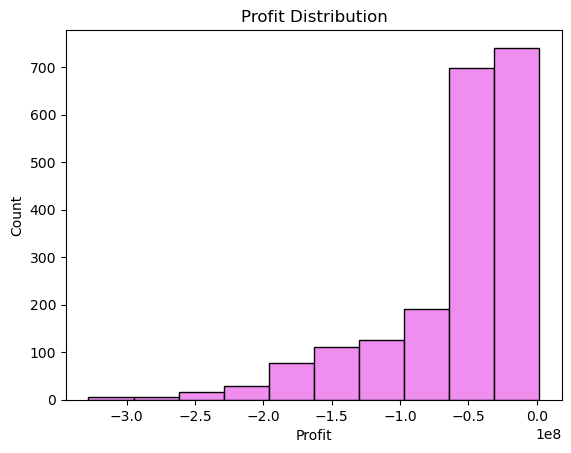

In [52]:
# Plot the distribution of budget

sns.histplot(x= df['Profit'], bins=10, color='violet', alpha= 0.9)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()

<Figure size 1200x500 with 0 Axes>

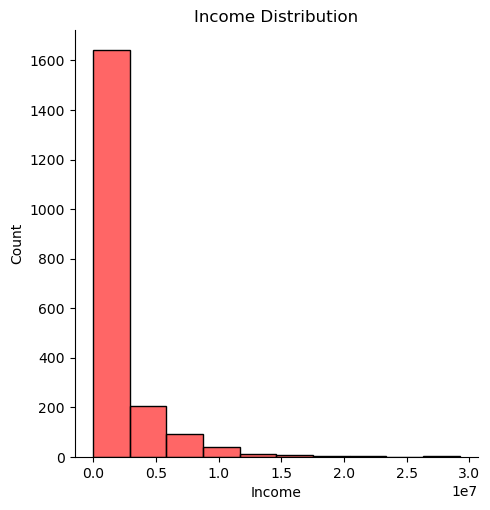

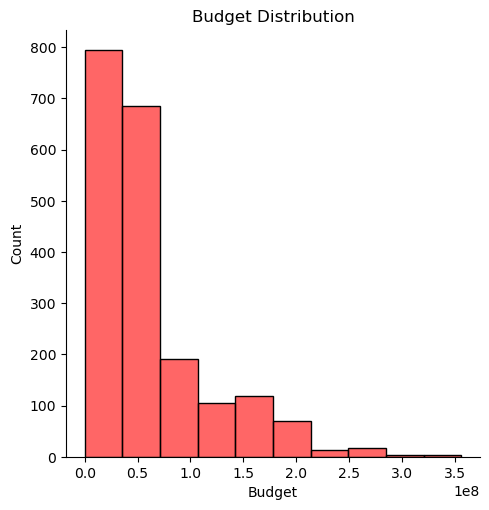

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of income
plt.figure(figsize=(12,5))
sns.displot(x=df['Income'], bins= 10, color='red', alpha= 0.6)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Plot the distribution of budget
sns.displot(x= df['Budget'], bins=10, color='red', alpha= 0.6)
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()

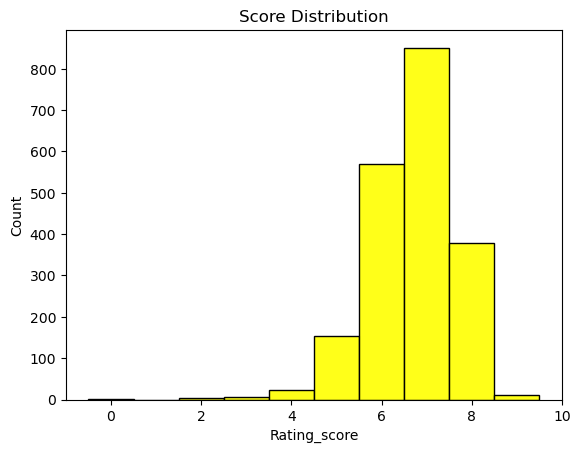

In [54]:
# Plot the distribution of rating
sns.histplot(x= df['Rating'], bins=10, color='yellow', alpha= 0.9)
plt.title('Score Distribution')
plt.xlabel('Rating_score')
plt.ylabel('Count')
plt.show()

df['Budget'] = df['Budget'].astype(int)
df['Income'] = df['Income'].astype(int)

In [55]:
def process_data(df):
    df['Profit'] = df['Profit'].apply(lambda x: round(x * 1e-2, 7))
    return process_data(df)

process_data

<function __main__.process_data(df)>

In [56]:
##Error. on returning profit with lamda function:'RecursionError: maximum recursion depth exceeded while calling a Python object'

process_data(df[['Profit']].describe())

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
df[['Profit']].describe()

In [ ]:
df2 = df.groupby('Rating')['Profit'].sum()

In [ ]:
df.describe()

In [57]:
df.dtypes

Title                 object
Rating                object
Year                   int64
Month                 object
Runtime               object
Directors             object
Stars                 object
Genre                 object
Filming_location      object
Budget               float64
Income               float64
Country_of_origin     object
Profit               float64
dtype: object

In [ ]:
##Another plot with multiple features
## Due to Nan values scatter plot gives error. 
df.plot(kind='scatter', x= df['Budget'], y= df['Income'], s= df['Profit'], cmap=plt.get_cmap("jet"), figsize=(10,6), 
        c= df['Rating'], colorbar=True, sharex=False)

plt.title('Budget, Income, Profit and Ratings')
plt.legend()
plt.show()

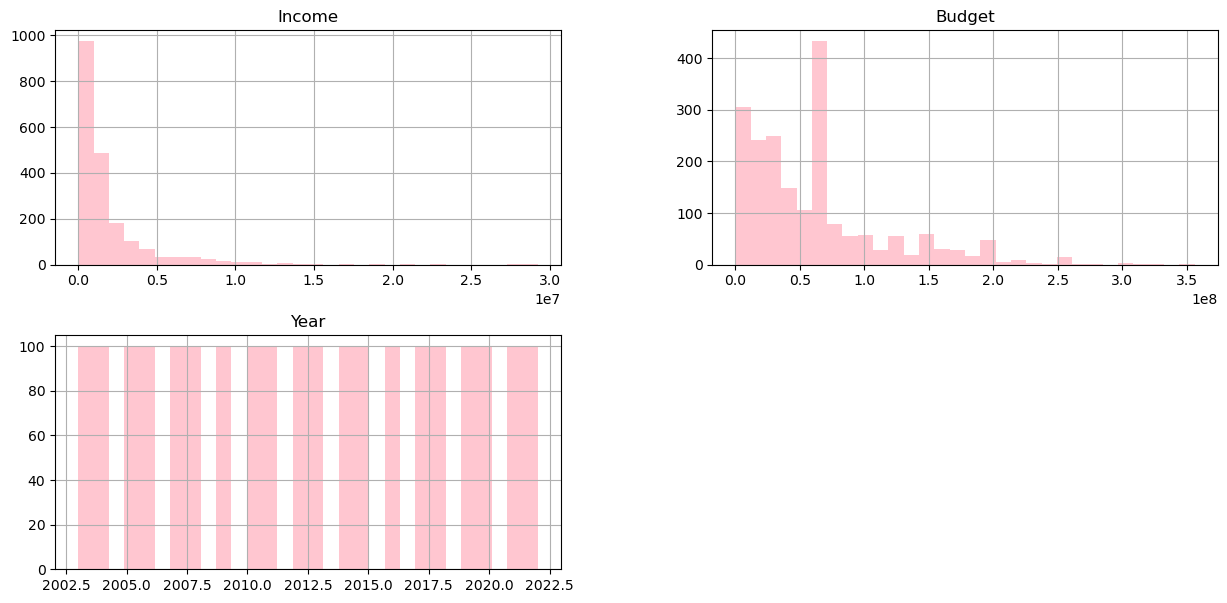

In [58]:
df = df[['Rating', 'Income', 'Budget', 'Year']]
df.hist(bins=30, figsize=(15,7), color='pink', alpha= 0.9)

plt.show() 
#Rating turn to int. again. 

processed_df still contains 'NaN' values, which annoys me. 

In [ ]:
# when working with levels /categorical data, these below will come handy
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas.getdummies